In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
np.random.seed(7)

In [7]:
df=pd.read_csv('air-passenger.csv')
dataset = df['#Passengers'].values
dataset = dataset.astype('float32')
dataset

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.], dtype=float32)

***Performed the Min Max Scaling using the sklearn MinMaxScaler***



In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset.reshape(-1, 1))

In [10]:
  train_size=int(len(dataset)*0.67)
  test_size=len(dataset)-train_size
  train,test=dataset[0:train_size,:],dataset[train_size:len(dataset):]

In [12]:
print(len(train),len(test))

96 48


In [14]:
def createDataset(dataset,look_back=1):
  datax,datay=[],[]
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    datax.append(a)
    datay.append(dataset[i+look_back,0])
  return np.array(datax),np.array(datay)

In [15]:
look_back=1
trainX,trainY=createDataset(train,look_back)
testX,testY=createDataset(test,look_back)
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))


In [16]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2)

Epoch 1/100
94/94 - 2s - 23ms/step - loss: 0.0399
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0188
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0151
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0139
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0129
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0120
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0110
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0101
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0091
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0081
Epoch 11/100
94/94 - 0s - 3ms/step - loss: 0.0072
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0066
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0057
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0051
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0044
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0039
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0034
Epoch 18/100
94/94 - 0s - 3ms/step - loss: 0.0031
Epoch 19/100
94/94 - 0s - 3ms/step - loss: 0.0028
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 21

In [17]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [18]:
trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print(trainScore,testScore)

22.889062774067376 48.01167782784449


In [21]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [23]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

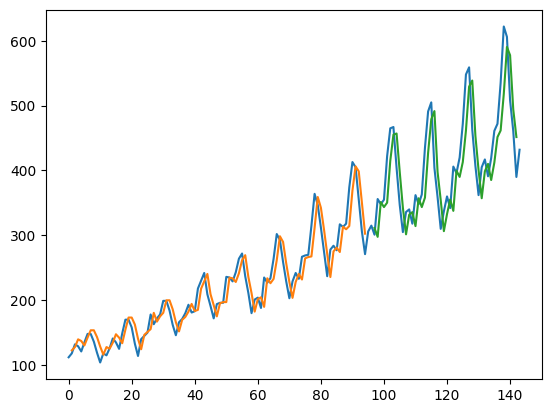

In [24]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()